In [2]:
from math import sqrt
import numpy as np
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pandas import read_csv
from datetime import datetime
from keras.layers import Bidirectional
import datetime
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from numpy import array
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

Using TensorFlow backend.


In [2]:
def rmse(pred, actual):
    error = np.subtract(pred, actual)
    sqerror= np.sum(np.square(error))/actual.shape[0]
    return np.sqrt(sqerror)

In [3]:
def Plot_Mean(name,Overall_Analysis,n_steps_out):
    labels = ['TrainRMSE(Mean)','TestRMSE(Mean)']
    MLP_Adam=[Overall_Analysis[0][0],Overall_Analysis[0][5]]
    MLP_Sgd=[Overall_Analysis[1][0],Overall_Analysis[1][5]]
    LSTM=[Overall_Analysis[2][0],Overall_Analysis[2][5]]
    Bi_LSTM=[Overall_Analysis[3][0],Overall_Analysis[3][5]]
    EN_DC=[Overall_Analysis[4][0],Overall_Analysis[4][5]]
    RNN=[Overall_Analysis[5][0],Overall_Analysis[5][5]]
    CNN=[Overall_Analysis[6][0],Overall_Analysis[6][5]]
    
    yer1=np.array([Overall_Analysis[0][3]-Overall_Analysis[0][0],Overall_Analysis[0][8]-Overall_Analysis[0][5]])
    yer2=np.array([Overall_Analysis[1][3]-Overall_Analysis[1][0],Overall_Analysis[1][8]-Overall_Analysis[1][5]])
    yer3=np.array([Overall_Analysis[2][3]-Overall_Analysis[2][0],Overall_Analysis[2][8]-Overall_Analysis[2][5]])
    yer4=np.array([Overall_Analysis[3][3]-Overall_Analysis[3][0],Overall_Analysis[3][8]-Overall_Analysis[3][5]])
    yer5=np.array([Overall_Analysis[4][3]-Overall_Analysis[4][0],Overall_Analysis[4][8]-Overall_Analysis[4][5]])
    yer6=np.array([Overall_Analysis[5][3]-Overall_Analysis[5][0],Overall_Analysis[5][8]-Overall_Analysis[5][5]])
    yer7=np.array([Overall_Analysis[6][3]-Overall_Analysis[6][0],Overall_Analysis[6][8]-Overall_Analysis[6][5]])
    
    width = 0.12  # the width of the bars
    Plot(name,labels,width,MLP_Adam,MLP_Sgd,LSTM,Bi_LSTM,EN_DC,RNN,CNN,yer1,yer2,yer3,yer4,yer5,yer6,yer7,"","","Train&Test_RMSE_Mean_Comparison",4)

def Plot_Step_RMSE_Mean(name,Overall_Analysis,n_steps_out):
    MLP_Adam=Overall_Analysis[0,10:n_steps_out*5+10:5]
    MLP_Sgd=Overall_Analysis[1,10:n_steps_out*5+10:5]
    LSTM=Overall_Analysis[2,10:n_steps_out*5+10:5]
    Bi_LSTM=Overall_Analysis[3,10:n_steps_out*5+10:5]
    EN_DC=Overall_Analysis[4,10:n_steps_out*5+10:5]
    RNN=Overall_Analysis[5,10:n_steps_out*5+10:5]
    CNN=Overall_Analysis[6,10:n_steps_out*5+10:5]
    yer1=np.subtract(Overall_Analysis[0,13:n_steps_out*5+10:5],MLP_Adam)
    yer2=np.subtract(Overall_Analysis[1,13:n_steps_out*5+10:5],MLP_Sgd)
    yer3=np.subtract(Overall_Analysis[2,13:n_steps_out*5+10:5],LSTM)
    yer4=np.subtract(Overall_Analysis[3,13:n_steps_out*5+10:5],Bi_LSTM)
    yer5=np.subtract(Overall_Analysis[4,13:n_steps_out*5+10:5],EN_DC)
    yer6=np.subtract(Overall_Analysis[5,13:n_steps_out*5+10:5],RNN)
    yer7=np.subtract(Overall_Analysis[6,13:n_steps_out*5+10:5],CNN)
    labels = []
    for j in range(n_steps_out):
        labels=np.concatenate((labels,[str(j+1)]))
    width = 0.12  # the width of the bars
    Plot(name,labels,width,MLP_Adam,MLP_Sgd,LSTM,Bi_LSTM,EN_DC,RNN,CNN,yer1,yer2,yer3,yer4,yer5,yer6,yer7,"Steps","RMSE(Mean)","Step_RMSE_Comparison",2)
    

def Plot(name,labels,width,MLP_Adam,MLP_Sgd,LSTM,Bi_LSTM,EN_DC,RNN,CNN,yer1,yer2,yer3,yer4,yer5,yer6,yer7,xlabel,ylabel,Gname,cap):
    r1 = np.arange(len(labels))
    r2 = [x + width for x in r1]
    r3 = [x + width for x in r2]
    r4 = [x + width for x in r3]
    r5 = [x + width for x in r4]
    r6 = [x + width for x in r5]
    r7 = [x + width for x in r6]

    fig, ax = plt.subplots()
    rects1 = ax.bar(r1, MLP_Adam, width,edgecolor = 'black', yerr=yer1, capsize=cap, label='FNN-Adam')
    rects2 = ax.bar(r2, MLP_Sgd, width,edgecolor = 'black', yerr=yer2,capsize=cap,  label='FNN-SGD')
    rects3 = ax.bar(r3, LSTM, width,edgecolor = 'black', yerr=yer3,capsize=cap,  label='LSTM')
    rects4 = ax.bar(r4, Bi_LSTM, width,edgecolor = 'black', yerr=yer4,capsize=cap,  label='BD-LSTM')
    rects5 = ax.bar(r5, EN_DC, width,edgecolor = 'black', yerr=yer5,capsize=cap,  label='ED-LSTM')
    rects6 = ax.bar(r6, RNN, width,edgecolor = 'black', yerr=yer6,capsize=cap,  label='RNN')
    rects7 = ax.bar(r7, CNN, width,edgecolor = 'black', yerr=yer7,capsize=cap,  label='CNN')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([r + width for r in range(len(MLP_Adam))], labels)
    plt.setp(ax.get_xticklabels(), fontsize=8)
    ax.legend()
    fig.tight_layout()
    plt.savefig("Results/"+name+"/"+Gname+".png",dpi=300)
    plt.show()
    

In [4]:
def MODEL_FNN_adam(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden):
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    mlp_adam = MLPRegressor(hidden_layer_sizes=(Hidden,), activation='relu', solver='adam', alpha=0.1,max_iter=Epochs, tol=0)
    Best_RMSE=1000   #Assigning a large number   
    
    start_time=time.time()
    for run in range(Num_Exp):
        print("Experiment",run+1,"in progress")
        mlp_adam.fit(x_train, y_train)
        y_predicttrain = mlp_adam.predict(x_train)
        y_predicttest = mlp_adam.predict(x_test)
        train_acc[run] = rmse( y_predicttrain, y_train) 
        print("TrainRMSE_Mean",train_acc[run]) 
        test_acc[run] = rmse( y_predicttest, y_test)
        print("TestRMSE_Mean",test_acc[run])
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j], y_test[:,j])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test

def MODEL_FNN_sgd(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden):
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    mlp_sgd = MLPRegressor(hidden_layer_sizes=(Hidden, ), activation='relu', solver='sgd', alpha=0.1,max_iter=Epochs, tol=0)
    Best_RMSE=1000   #Assigning a large number  
    
    start_time=time.time()
    for run in range(Num_Exp):
        print("Experiment",run+1,"in progress")
        mlp_sgd.fit(x_train,y_train)
        y_predicttrain = mlp_sgd.predict(x_train)
        y_predicttest = mlp_sgd.predict(x_test)
        train_acc[run] = rmse( y_predicttrain,y_train) 
        test_acc[run] = rmse( y_predicttest, y_test) 
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j], y_test[:,j])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test
 
    
def MODEL_LSTM(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden):
    n_features = 1
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
    print(x_train.shape)
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))
    print(x_test.shape)
    
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    
    model = Sequential()
    model.add(LSTM(Hidden, activation='relu', input_shape=(n_steps_in,n_features)))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    Best_RMSE=1000   #Assigning a large number 
    
    start_time=time.time()
    for run in range(Num_Exp):
        print("Experiment",run+1,"in progress")
        # fit model
        model.fit(x_train, y_train, epochs=Epochs,batch_size=64, verbose=0, shuffle=False)
        y_predicttrain = model.predict(x_train)
        y_predicttest = model.predict(x_test)
        train_acc[run] = rmse( y_predicttrain,y_train) 
        test_acc[run] = rmse( y_predicttest, y_test) 
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j], y_test[:,j])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test


def MODEL_Bi_LSTM(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden):
    n_features = 1
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
    print(x_train.shape)
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))
    print(x_test.shape)
    
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    
    model = Sequential()
    model.add(Bidirectional(LSTM(Hidden, activation='relu'), input_shape=(n_steps_in,n_features)))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    
    Best_RMSE=1000   #Assigning a large number 
    start_time=time.time()
    for run in range(Num_Exp):
        print("Experiment",run+1,"in progress")
        # fit model
        model.fit(x_train, y_train, epochs=Epochs,batch_size=64, verbose=0, shuffle=False)
        y_predicttrain = model.predict(x_train)
        y_predicttest = model.predict(x_test)
        train_acc[run] = rmse( y_predicttrain,y_train) 
        test_acc[run] = rmse( y_predicttest, y_test) 
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j], y_test[:,j])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test


def MODEL_EN_DC(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden):
    n_features = 1
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
    print(x_train.shape)
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))
    print(x_test.shape)
    y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
    print(y_train.shape)
    y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
    print(y_test.shape)
    
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    
    model = Sequential()
    model.add(LSTM(Hidden, activation='relu',input_shape=(n_steps_in,n_features)))
    model.add(RepeatVector(n_steps_out))
    model.add(LSTM(Hidden, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(1,activation='relu')))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    
    Best_RMSE=1000   #Assigning a large number 
    start_time=time.time()
    for run in range(Num_Exp):
        print("Experiment",run+1,"in progress")
        # fit model
        model.fit(x_train, y_train, epochs=Epochs,batch_size=64, verbose=0, shuffle=False)
        y_predicttrain = model.predict(x_train)
        y_predicttest = model.predict(x_test)
        train_acc[run] = rmse( y_predicttrain,y_train) 
        test_acc[run] = rmse( y_predicttest, y_test) 
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j,0], y_test[:,j,0])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test.reshape(y_test.shape[0], y_test.shape[1])

class RNN_Model(nn.Module):
    def __init__(self, batch_size, n_inputs, n_neurons, n_outputs):
        super(RNN_Model, self).__init__()
        self.batch_size=batch_size
        self.n_inputs=n_inputs
        self.n_neurons=n_neurons
        self.n_outputs=n_outputs
        self.rnn = nn.RNNCell(n_inputs, n_neurons)
        self.hx = torch.zeros(batch_size, n_neurons) # initialize hidden state
        self.FC = nn.Linear(n_neurons, n_outputs)
    def forward(self, X):
        self.hx = torch.zeros(self.batch_size, self.n_neurons)
        self.hx = self.rnn(X, self.hx)
        out = self.FC(self.hx)  
        out=out.reshape(out.size(1))
        return out

def MODEL_RNN(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden):
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    Best_RMSE=1000   #Assigning a large number 
    start_time=time.time()
      
    # Define hyperparameters
    n_epochs = Epochs
    lr=0.01
    
    x_train = torch.tensor(x_train, dtype = torch.float)
    x_test = torch.tensor(x_test, dtype = torch.float)
    y_train = torch.tensor(y_train, dtype = torch.float)
    x_train=x_train.resize_((x_train.size(0),1,x_train.size(1)))
    x_test=x_test.resize_((x_test.size(0),1,x_test.size(1)))
    for run in range(Num_Exp):
        model = RNN_Model(1, n_steps_in,Hidden,n_steps_out)
        # Define Loss, Optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        print("Experiment",run+1,"in progress")
        for epoch in range(0, n_epochs):
            for i in range(x_train.size(0)):
                optimizer.zero_grad()    # Clears existing gradients from previous epoch
                output_val = model(x_train[i])
                loss = criterion(output_val, y_train[i])
                loss.backward(retain_graph=True)     # Does backpropagation and calculates gradients
                optimizer.step()     # Updates the weights accordingly 
        
        y_predicttrain=[]
        for i in range(x_train.size(0)):
            output_val = model(x_train[i])
            y_predicttrain.append(output_val.tolist())
        y_predicttrain=np.array(y_predicttrain)
        
        y_predicttest=[] 
        for i in range(x_test.size(0)):
            output_val = model(x_test[i])
            y_predicttest.append(output_val.tolist())
        y_predicttest=np.array(y_predicttest)
        
        train_acc[run] = rmse( y_predicttrain,np.array(y_train.tolist()))
        print("TrainRMSE_Mean",train_acc[run]) 
        test_acc[run] = rmse( y_predicttest, y_test) 
        print("TestRMSE_Mean",test_acc[run]) 
        
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j], y_test[:,j])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test.reshape(y_test.shape[0], y_test.shape[1])

def MODEL_CNN(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden):
    n_features = 1
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
    print(x_train.shape)
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))
    print(x_test.shape)
    
    train_acc=np.zeros(Num_Exp)
    test_acc=np.zeros(Num_Exp)
    Step_RMSE=np.zeros([Num_Exp,n_steps_out])
    
    # define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps_in,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(Hidden, activation='relu'))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    print(model.summary())
    Best_RMSE=1000   #Assigning a large number 
    
    start_time=time.time()
    for run in range(Num_Exp):
        print("Experiment",run+1,"in progress")
        # fit model
        model.fit(x_train, y_train, epochs=Epochs,batch_size=64, verbose=0, shuffle=False)
        y_predicttrain = model.predict(x_train)
        y_predicttest = model.predict(x_test)
        train_acc[run] = rmse( y_predicttrain,y_train) 
        test_acc[run] = rmse( y_predicttest, y_test) 
        if test_acc[run]<Best_RMSE:
            Best_RMSE=test_acc[run]
            Best_Predict_Test=y_predicttest
        for j in range(n_steps_out):
            Step_RMSE[run][j]=rmse(y_predicttest[:,j], y_test[:,j])
            
    print("Total time for",Num_Exp,"experiments",time.time()-start_time)
    return train_acc,test_acc,Step_RMSE,Best_Predict_Test

Lazer
Experiment 1 in progress
TrainRMSE_Mean 0.32618663072604753
TestRMSE_Mean 0.2583555028961523
Experiment 2 in progress
TrainRMSE_Mean 0.31549455792026354
TestRMSE_Mean 0.250425993677217
Experiment 3 in progress
TrainRMSE_Mean 0.32145692054929736
TestRMSE_Mean 0.26239687365857484
Experiment 4 in progress
TrainRMSE_Mean 0.3191640898063775
TestRMSE_Mean 0.26035031671191394
Experiment 5 in progress
TrainRMSE_Mean 0.3253761365036911
TestRMSE_Mean 0.2739544685712203
Experiment 6 in progress
TrainRMSE_Mean 0.31754176092607495
TestRMSE_Mean 0.2563816768507669
Experiment 7 in progress
TrainRMSE_Mean 0.31044504983736426
TestRMSE_Mean 0.24214099639513556
Experiment 8 in progress
TrainRMSE_Mean 0.3120449414502667
TestRMSE_Mean 0.2461433202252323
Experiment 9 in progress
TrainRMSE_Mean 0.32018867505003207
TestRMSE_Mean 0.26090560492474246
Experiment 10 in progress
TrainRMSE_Mean 0.3271066037073577
TestRMSE_Mean 0.27546360985486157
Experiment 11 in progress
TrainRMSE_Mean 0.31143902491690906
Te

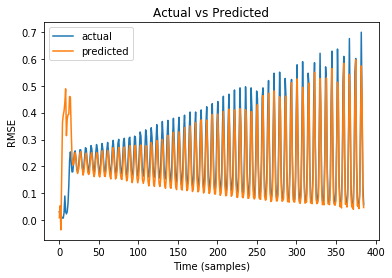

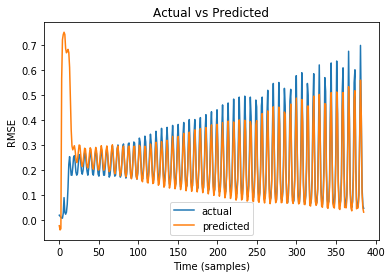

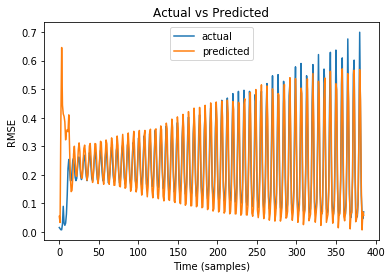

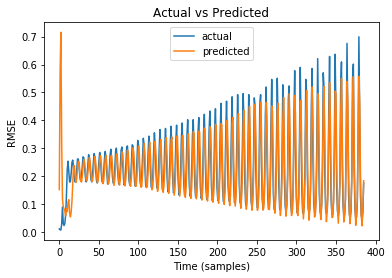

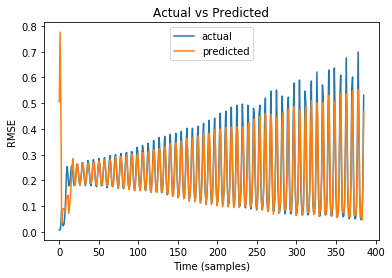

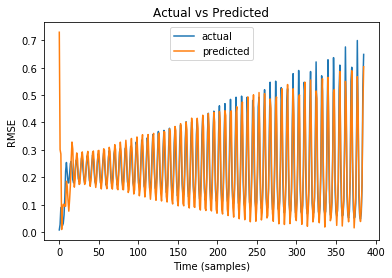

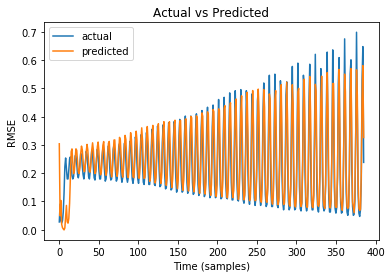

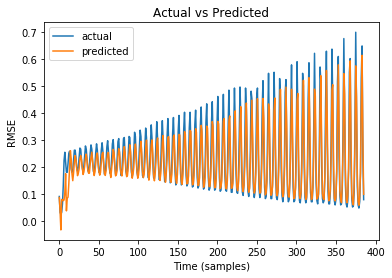

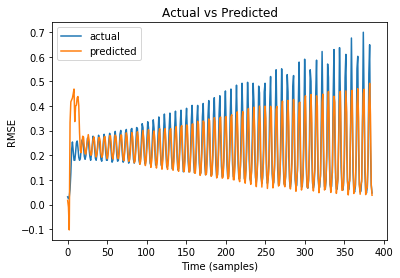

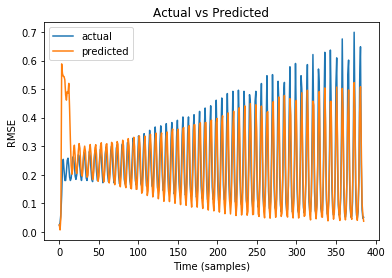

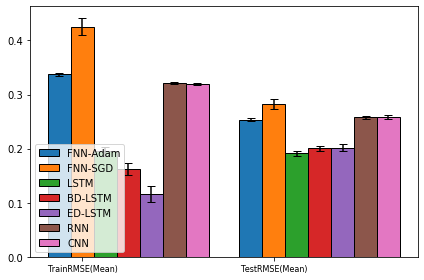

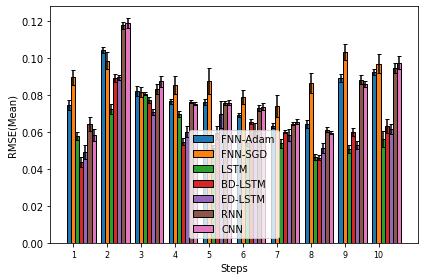

Sunspot
Experiment 1 in progress
TrainRMSE_Mean 0.18550915775697696
TestRMSE_Mean 0.13392014902046157
Experiment 2 in progress
TrainRMSE_Mean 0.1846319218703026
TestRMSE_Mean 0.13318007662657666
Experiment 3 in progress
TrainRMSE_Mean 0.18548374272419862
TestRMSE_Mean 0.13509764249544107
Experiment 4 in progress
TrainRMSE_Mean 0.1839130487761979
TestRMSE_Mean 0.13336163278269786
Experiment 5 in progress
TrainRMSE_Mean 0.1861165934107503
TestRMSE_Mean 0.13281693808866218
Experiment 6 in progress
TrainRMSE_Mean 0.18824488539283973
TestRMSE_Mean 0.13490307988220404
Experiment 7 in progress
TrainRMSE_Mean 0.1855783404224949
TestRMSE_Mean 0.13302361495987372
Experiment 8 in progress
TrainRMSE_Mean 0.18724225403932626
TestRMSE_Mean 0.1347269887367062
Experiment 9 in progress
TrainRMSE_Mean 0.18697121801001487
TestRMSE_Mean 0.13417213201945297
Experiment 10 in progress
TrainRMSE_Mean 0.18444004062378522
TestRMSE_Mean 0.13426448395981372
Experiment 11 in progress
TrainRMSE_Mean 0.1850472383216

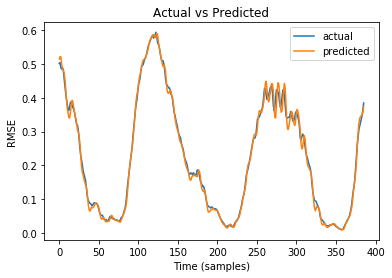

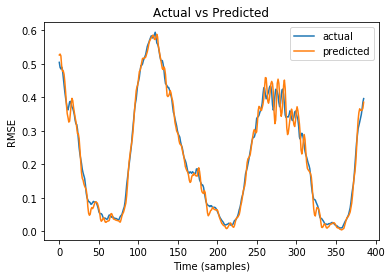

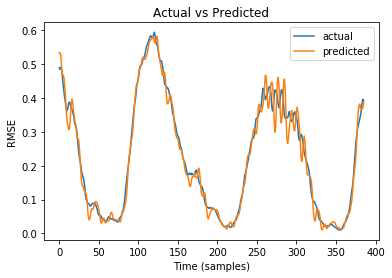

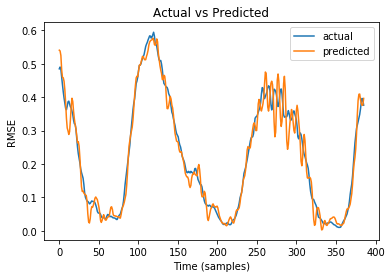

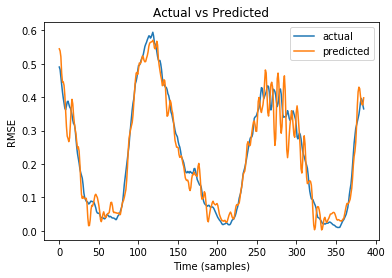

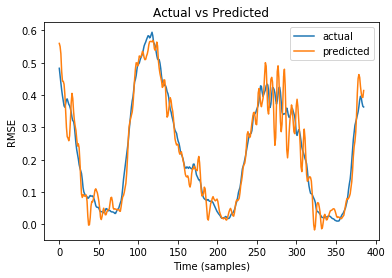

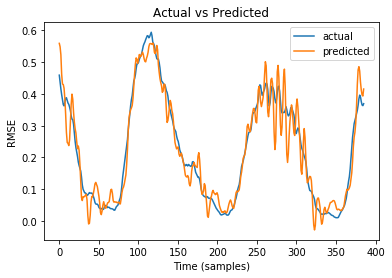

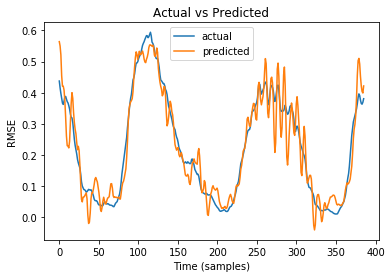

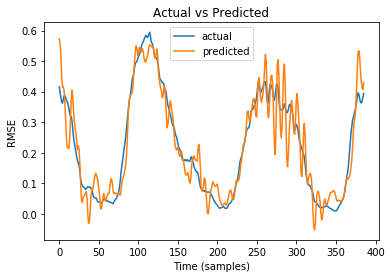

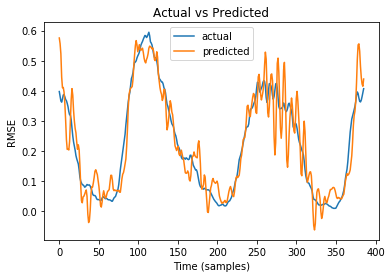

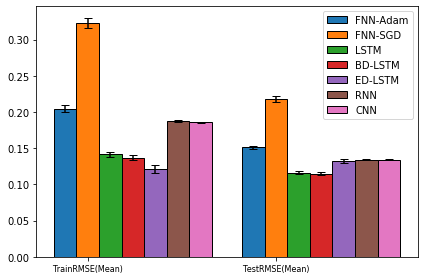

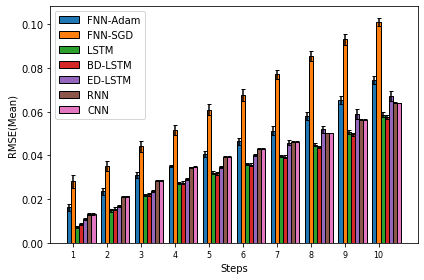

Mackey
Experiment 1 in progress
TrainRMSE_Mean 0.13103924352058952
TestRMSE_Mean 0.1314020303543821
Experiment 2 in progress
TrainRMSE_Mean 0.1324897564873419
TestRMSE_Mean 0.13291745023491874
Experiment 3 in progress
TrainRMSE_Mean 0.13146366841839754
TestRMSE_Mean 0.13187497197517659
Experiment 4 in progress
TrainRMSE_Mean 0.13279384690432122
TestRMSE_Mean 0.1331652294712956
Experiment 5 in progress
TrainRMSE_Mean 0.13101341712023776
TestRMSE_Mean 0.13137195242299665
Experiment 6 in progress
TrainRMSE_Mean 0.13228063052702477
TestRMSE_Mean 0.13267781695084013
Experiment 7 in progress
TrainRMSE_Mean 0.13155855375448994
TestRMSE_Mean 0.13193322509154107
Experiment 8 in progress
TrainRMSE_Mean 0.13299340784808242
TestRMSE_Mean 0.1334422780401174
Experiment 9 in progress
TrainRMSE_Mean 0.13274198368510257
TestRMSE_Mean 0.13315486519712938
Experiment 10 in progress
TrainRMSE_Mean 0.13061539834060076
TestRMSE_Mean 0.13101691788221817
Experiment 11 in progress
TrainRMSE_Mean 0.1326351459219

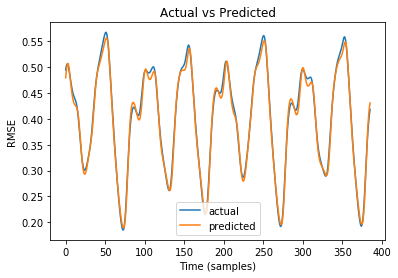

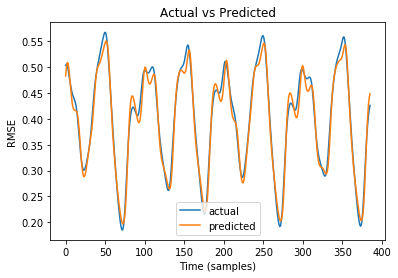

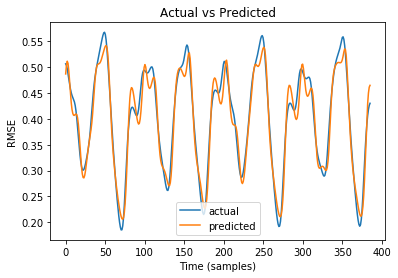

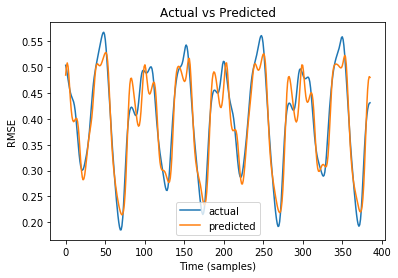

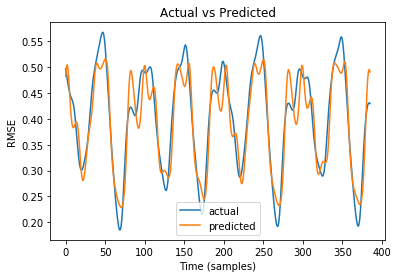

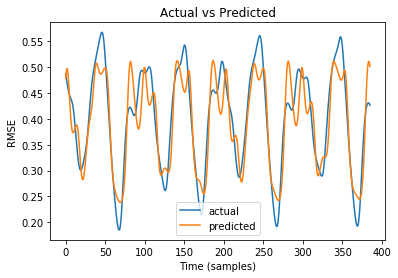

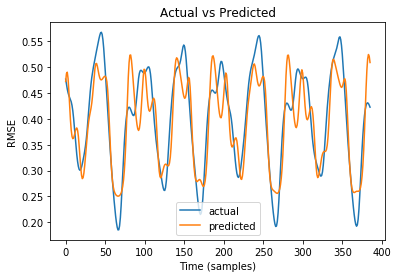

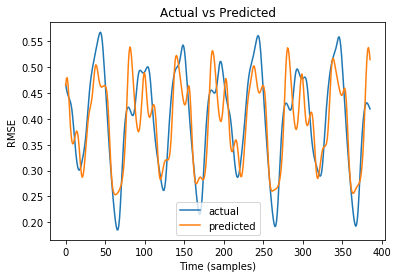

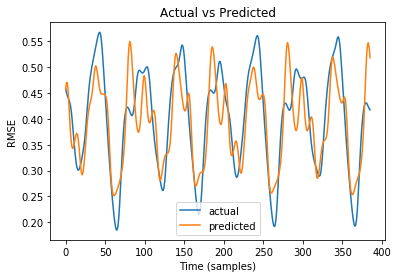

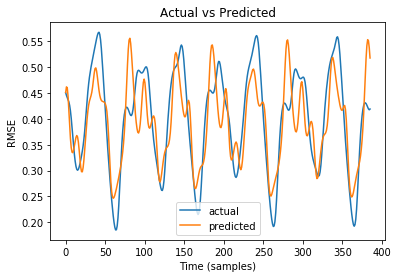

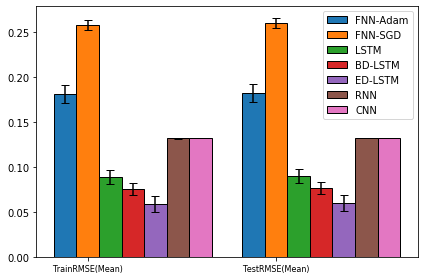

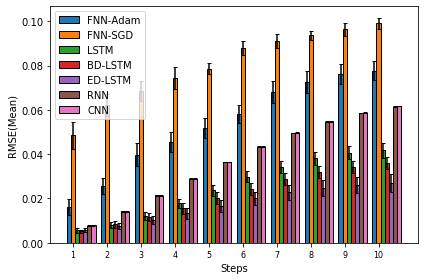

Lorenz
Experiment 1 in progress
TrainRMSE_Mean 0.07288259862049343
TestRMSE_Mean 0.07300340946561867
Experiment 2 in progress
TrainRMSE_Mean 0.18164608074809482
TestRMSE_Mean 0.19039564858417
Experiment 3 in progress
TrainRMSE_Mean 0.08045876275400911
TestRMSE_Mean 0.08006845486624074
Experiment 4 in progress
TrainRMSE_Mean 0.03895492923561372
TestRMSE_Mean 0.03764804287610323
Experiment 5 in progress
TrainRMSE_Mean 0.06789263102609035
TestRMSE_Mean 0.06626284907384448
Experiment 6 in progress
TrainRMSE_Mean 0.03922277089254527
TestRMSE_Mean 0.039456942435572476
Experiment 7 in progress
TrainRMSE_Mean 0.07431765123755292
TestRMSE_Mean 0.07408279351832009
Experiment 8 in progress
TrainRMSE_Mean 0.1413319355693957
TestRMSE_Mean 0.1469047402580358
Experiment 9 in progress
TrainRMSE_Mean 0.0477468463707691
TestRMSE_Mean 0.048329539837602145
Experiment 10 in progress
TrainRMSE_Mean 0.05342592305462527
TestRMSE_Mean 0.05136374437530793
Experiment 11 in progress
TrainRMSE_Mean 0.0453663692754

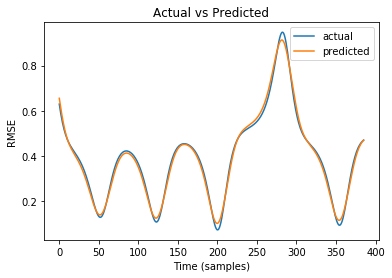

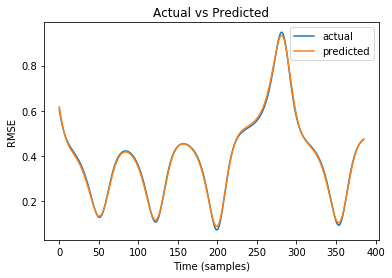

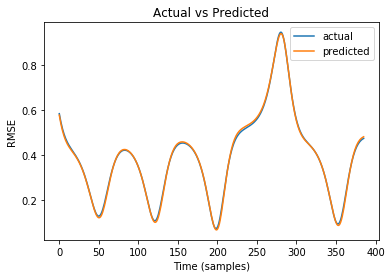

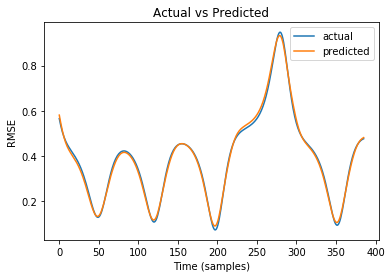

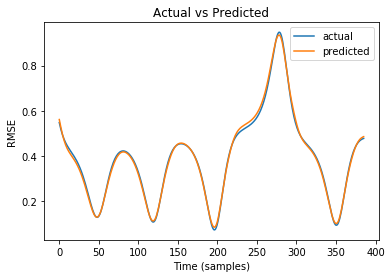

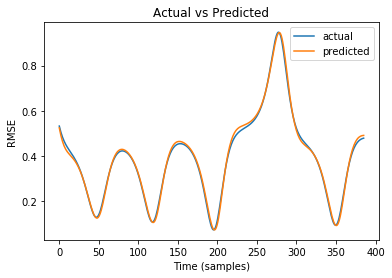

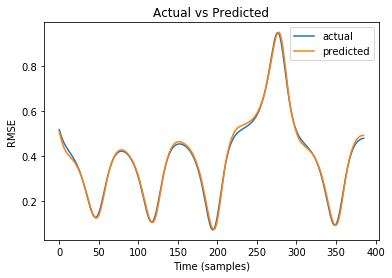

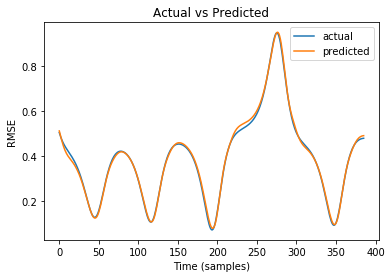

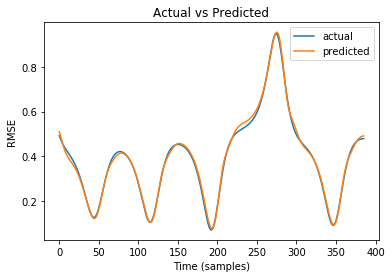

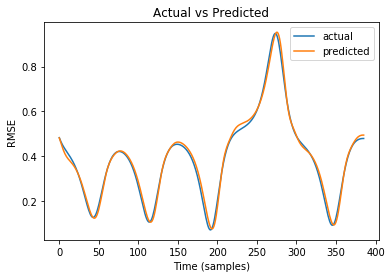

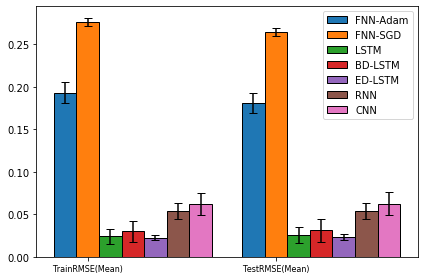

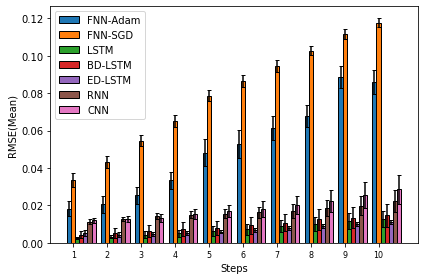

Rossler
Experiment 1 in progress
TrainRMSE_Mean 0.10864150330520145
TestRMSE_Mean 0.10276432388062942
Experiment 2 in progress
TrainRMSE_Mean 0.10855789455849663
TestRMSE_Mean 0.10288199816959649
Experiment 3 in progress
TrainRMSE_Mean 0.10830706056906725
TestRMSE_Mean 0.10307834371502488
Experiment 4 in progress
TrainRMSE_Mean 0.11287104829729
TestRMSE_Mean 0.10679313915678539
Experiment 5 in progress
TrainRMSE_Mean 0.11198809929022849
TestRMSE_Mean 0.10557850594205394
Experiment 6 in progress
TrainRMSE_Mean 0.10698356293359587
TestRMSE_Mean 0.10131445098729613
Experiment 7 in progress
TrainRMSE_Mean 0.11374541881729715
TestRMSE_Mean 0.10706816473676237
Experiment 8 in progress
TrainRMSE_Mean 0.1085523994447137
TestRMSE_Mean 0.1026042116939951
Experiment 9 in progress
TrainRMSE_Mean 0.11109690414661667
TestRMSE_Mean 0.10464099837796834
Experiment 10 in progress
TrainRMSE_Mean 0.11137348087142994
TestRMSE_Mean 0.10520213872718326
Experiment 11 in progress
TrainRMSE_Mean 0.1117270056456

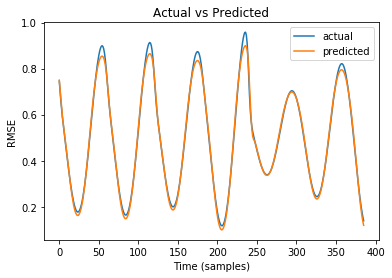

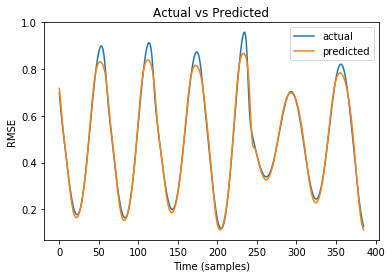

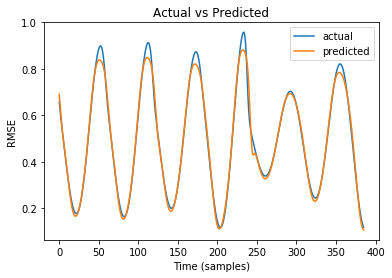

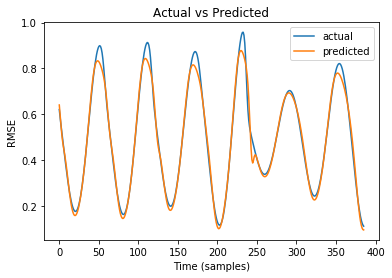

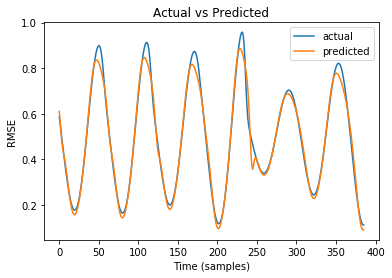

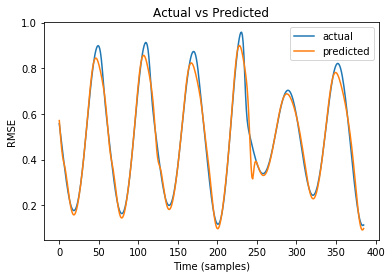

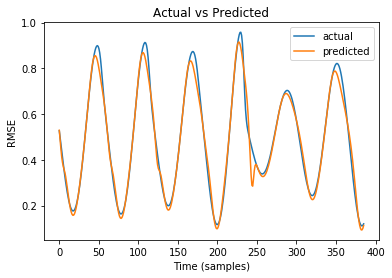

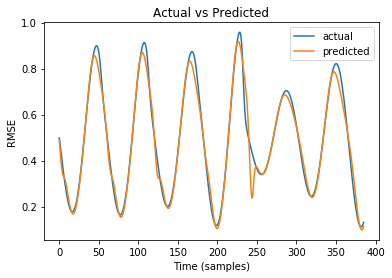

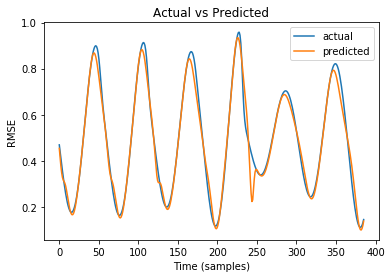

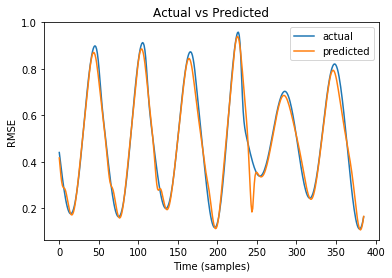

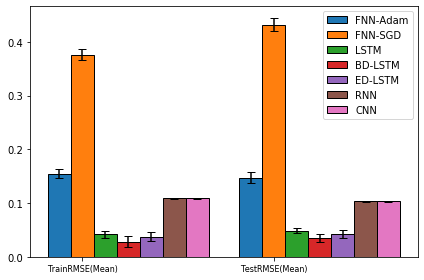

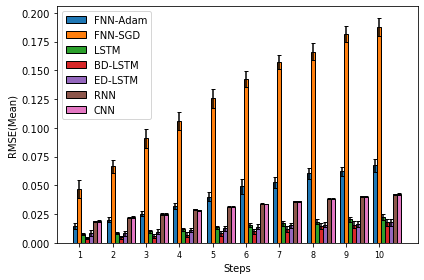

Henon
Experiment 1 in progress
TrainRMSE_Mean 0.5130737189033724
TestRMSE_Mean 0.5044265110445918
Experiment 2 in progress
TrainRMSE_Mean 0.5297830528036926
TestRMSE_Mean 0.520679061126807
Experiment 3 in progress
TrainRMSE_Mean 0.5141063023167004
TestRMSE_Mean 0.5051644407489416
Experiment 4 in progress
TrainRMSE_Mean 0.5314754691742982
TestRMSE_Mean 0.5229691739803185
Experiment 5 in progress
TrainRMSE_Mean 0.5201343930328896
TestRMSE_Mean 0.5118315200066059
Experiment 6 in progress
TrainRMSE_Mean 0.5320987780889096
TestRMSE_Mean 0.523124963993659
Experiment 7 in progress
TrainRMSE_Mean 0.5305398113755905
TestRMSE_Mean 0.5220205393562576
Experiment 8 in progress
TrainRMSE_Mean 0.5183329879858326
TestRMSE_Mean 0.5096646837020935
Experiment 9 in progress
TrainRMSE_Mean 0.542120751084958
TestRMSE_Mean 0.5336011467641523
Experiment 10 in progress
TrainRMSE_Mean 0.5338295706124303
TestRMSE_Mean 0.5247685215880229
Experiment 11 in progress
TrainRMSE_Mean 0.5338045770235716
TestRMSE_Mean 0.

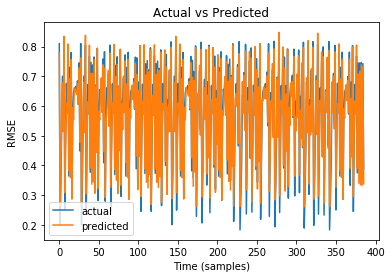

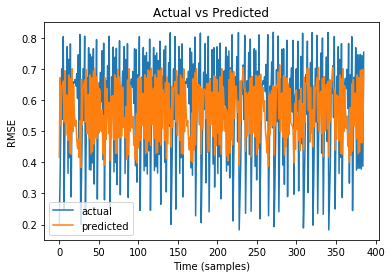

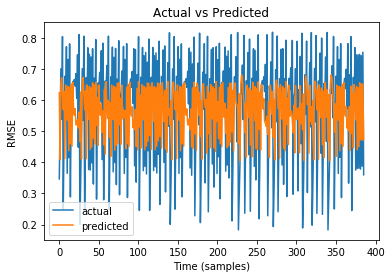

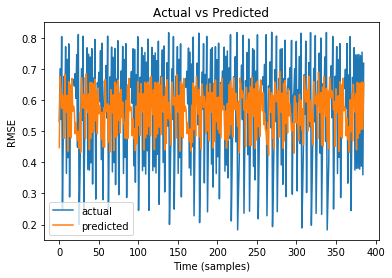

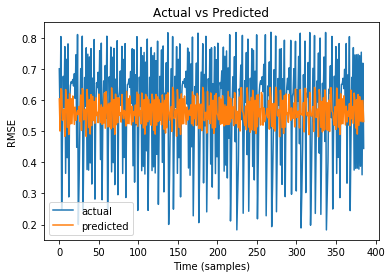

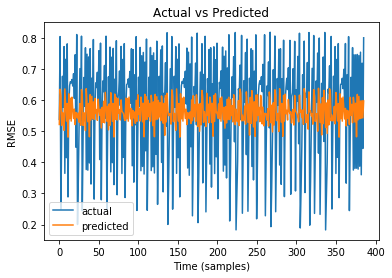

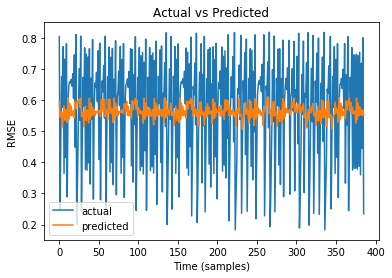

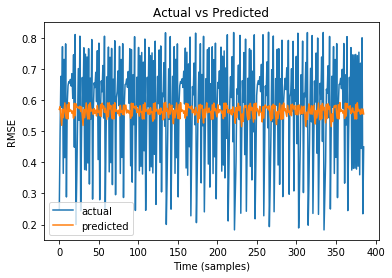

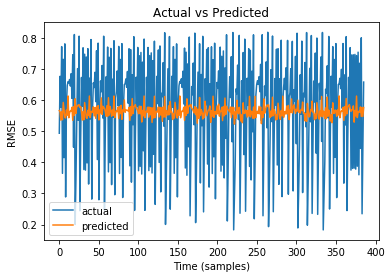

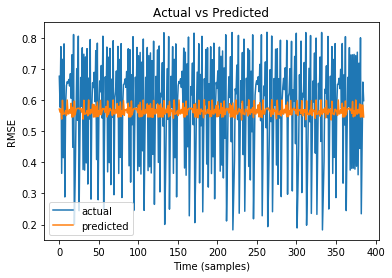

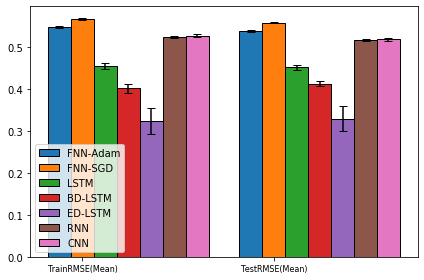

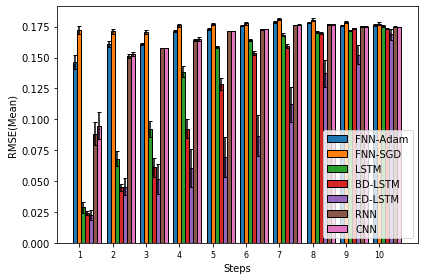

ACFinance
Experiment 1 in progress
TrainRMSE_Mean 0.1880172207482164
TestRMSE_Mean 0.09106163737338598
Experiment 2 in progress
TrainRMSE_Mean 0.19494808515258386
TestRMSE_Mean 0.09517010076697044
Experiment 3 in progress
TrainRMSE_Mean 0.19898541799324304
TestRMSE_Mean 0.09682488307957421
Experiment 4 in progress
TrainRMSE_Mean 0.1962356420590708
TestRMSE_Mean 0.09511651668610631
Experiment 5 in progress
TrainRMSE_Mean 0.19675085149810198
TestRMSE_Mean 0.0959784085739219
Experiment 6 in progress
TrainRMSE_Mean 0.1955618258376124
TestRMSE_Mean 0.09531137721652204
Experiment 7 in progress
TrainRMSE_Mean 0.20186609254557386
TestRMSE_Mean 0.09756127981509728
Experiment 8 in progress
TrainRMSE_Mean 0.19185888045365138
TestRMSE_Mean 0.09408476106121678
Experiment 9 in progress
TrainRMSE_Mean 0.18805609228591222
TestRMSE_Mean 0.09046648900229749
Experiment 10 in progress
TrainRMSE_Mean 0.19136088113330554
TestRMSE_Mean 0.09262107974373583
Experiment 11 in progress
TrainRMSE_Mean 0.1895552337

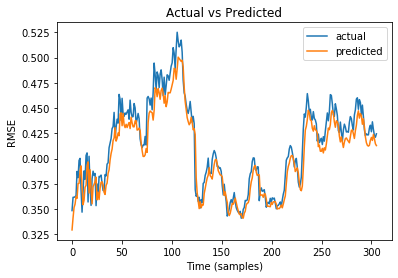

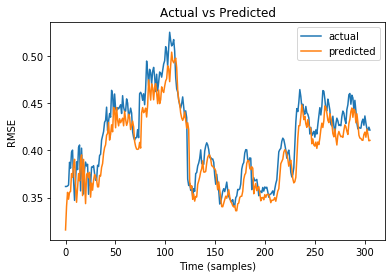

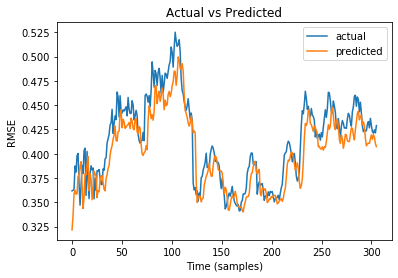

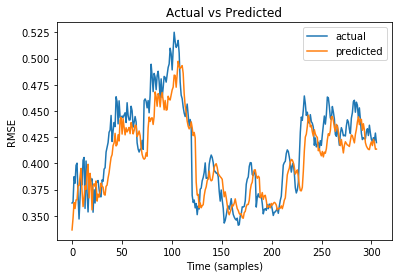

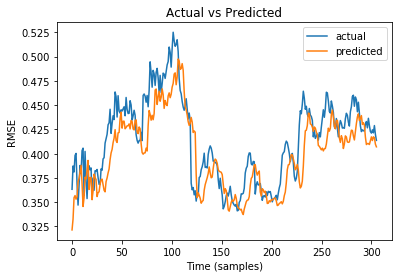

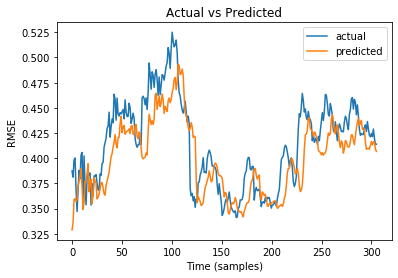

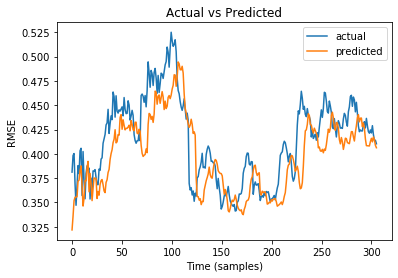

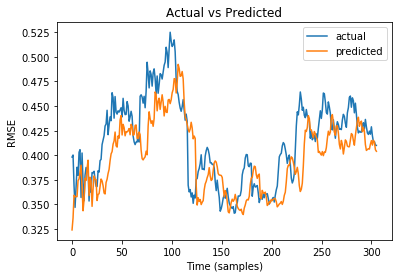

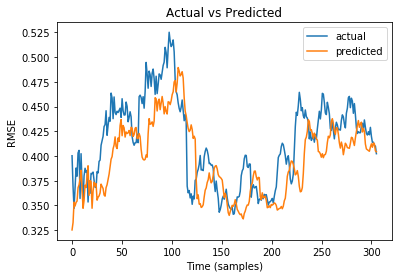

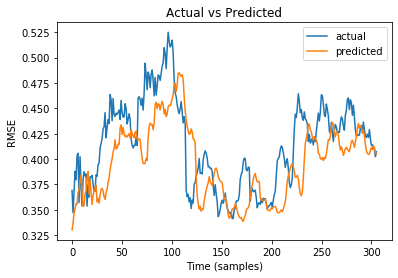

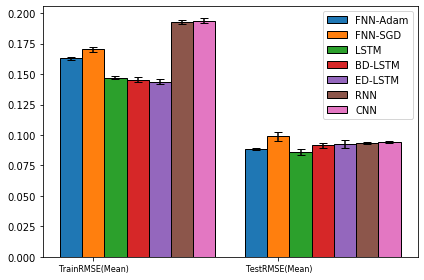

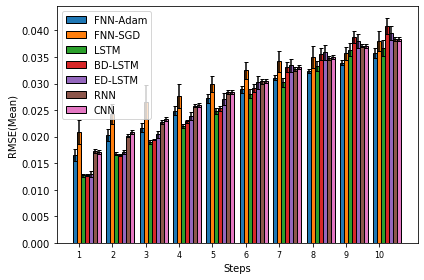

      Dataset    Method Train-RMSE_Mean Train-RMSE_Std Train-CI-LB  \
0       Lazer  FNN-Adam          0.3371         0.0074      0.3344   
1       Lazer   FNN-SGD          0.4251          0.044      0.4094   
2       Lazer      LSTM          0.1954         0.0229      0.1872   
3       Lazer   BD-LSTM          0.1619         0.0296      0.1513   
4       Lazer   ED-LSTM          0.1166         0.0412      0.1019   
5       Lazer       RNN           0.321         0.0057       0.319   
6       Lazer       CNN          0.3191         0.0055      0.3171   
7     Sunspot  FNN-Adam          0.2043         0.0132      0.1996   
8     Sunspot   FNN-SGD           0.323          0.018      0.3165   
9     Sunspot      LSTM          0.1418         0.0094      0.1384   
10    Sunspot   BD-LSTM          0.1369         0.0092      0.1336   
11    Sunspot   ED-LSTM           0.121         0.0158      0.1153   
12    Sunspot       RNN          0.1875         0.0031      0.1864   
13    Sunspot       

In [5]:
def main():
    
    n_steps_in, n_steps_out = 5,10
    
#     Overall_Analysis=np.zeros([42,10+n_steps_out*5])
    Overall_Analysis = pd.read_csv("Results/OverallAnalysis.csv",index_col = 0)
    Overall_Analysis=Overall_Analysis.values
    Overall_Analysis=Overall_Analysis[:,2:]
    for i in range(1,8):
        problem=i
        if problem ==1:
            TrainData = pd.read_csv("../data/Lazer/train1.csv",index_col = 0)
            TrainData = TrainData.values
            TestData = pd.read_csv("../data/Lazer/test1.csv",index_col = 0)
            TestData = TestData.values
            name= "Lazer"
        if problem ==2:
            TrainData = pd.read_csv("../data/Sunspot/train1.csv",index_col = 0)
            TrainData = TrainData.values
            TestData = pd.read_csv("../data/Sunspot/test1.csv",index_col = 0)
            TestData = TestData.values
            name= "Sunspot"
        if problem ==3:
            TrainData = pd.read_csv("../data/Mackey/train1.csv",index_col = 0)
            TrainData = TrainData.values
            TestData = pd.read_csv("../data/Mackey/test1.csv",index_col = 0)
            TestData = TestData.values
            name="Mackey"
        if problem ==4:
            TrainData = pd.read_csv("../data/Lorenz/train1.csv",index_col = 0)
            TrainData = TrainData.values
            TestData = pd.read_csv("../data/Lorenz/test1.csv",index_col = 0)
            TestData = TestData.values  
            name= "Lorenz"
        if problem ==5:
            TrainData = pd.read_csv("../data/Rossler/train1.csv",index_col = 0)
            TrainData = TrainData.values
            TestData = pd.read_csv("../data/Rossler/test1.csv",index_col = 0)
            TestData = TestData.values
            name= "Rossler"
        if problem ==6:
            TrainData = pd.read_csv("../data/Henon/train1.csv",index_col = 0)
            TrainData = TrainData.values
            TestData = pd.read_csv("../data/Henon/test1.csv",index_col = 0)
            TestData = TestData.values
            name= "Henon"
        if problem ==7:
            TrainData = pd.read_csv("../data/ACFinance/train1.csv",index_col = 0)
            TrainData = TrainData.values
            TestData = pd.read_csv("../data/ACFinance/test1.csv",index_col = 0)
            TestData = TestData.values
            name= "ACFinance" 

        x_train = TrainData[:,0:n_steps_in]
        y_train = TrainData[:,n_steps_in : n_steps_in+n_steps_out ]
        x_test = TestData[:,0:n_steps_in]
        y_test = TestData[:,n_steps_in : n_steps_in+n_steps_out]

        print(name)
        Num_Exp=30    #No. of experiments
        Epochs=1000
        Hidden=10
        train_acc=np.zeros(Num_Exp)
        test_acc=np.zeros(Num_Exp)
        Step_RMSE=np.zeros([Num_Exp,n_steps_out])


        for k in range(7,8):

            method=k
            if method ==1:
                train_acc,test_acc,Step_RMSE,Best_Predict_Test=MODEL_FNN_adam(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden)
                Mname="MODEL_FNN_adam"
            if method ==2:
                train_acc,test_acc,Step_RMSE,Best_Predict_Test=MODEL_FNN_sgd(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden)
                Mname="MODEL_FNN_sgd"
            if method ==3:
                train_acc,test_acc,Step_RMSE,Best_Predict_Test=MODEL_LSTM(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden)
                Mname="MODEL_LSTM"
            if method ==4:
                train_acc,test_acc,Step_RMSE,Best_Predict_Test=MODEL_Bi_LSTM(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden)
                Mname="MODEL_Bi_LSTM"
            if method ==5:
                train_acc,test_acc,Step_RMSE,Best_Predict_Test=MODEL_EN_DC(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden)
                Mname="MODEL_EN_DC"
            if method ==6:
                train_acc,test_acc,Step_RMSE,Best_Predict_Test=MODEL_RNN(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden)
                Mname="MODEL_RNN"
            if method ==7:
                train_acc,test_acc,Step_RMSE,Best_Predict_Test=MODEL_RNN(x_train,x_test,y_train,y_test,Num_Exp,n_steps_in,n_steps_out,Epochs,Hidden)
                Mname="MODEL_CNN"
                

            print(Mname)

            arr = np.dstack((train_acc,test_acc))
            arr=arr.reshape(Num_Exp,2)
            arr=np.concatenate((arr,Step_RMSE), axis=1)
            arr=arr.reshape(Num_Exp,2+n_steps_out)
            
            ExpIndex=np.array([])
            for j in range(Num_Exp):
                ExpIndex=np.concatenate((ExpIndex,["Exp"+str(j+1)]))

            ExpIndex1=['TrainRMSE','TestRMSE']
            for j in range(n_steps_out):
                ExpIndex1=np.concatenate((ExpIndex1,["Step"+str(j+1)]))
                
            arr=np.round_(arr, decimals = 5) 
            arr = pd.DataFrame(arr, index = ExpIndex , columns = ExpIndex1)
            arr.to_csv("Results/"+name+"/"+Mname+"/ExpAnalysis.csv")
            print(arr)
            
            Train_Mean=np.mean(train_acc)
            Train_Std=np.std(train_acc)
            Train_CI_LB= Train_Mean-1.96*(Train_Std/np.sqrt(Num_Exp))
            Train_CI_UB= Train_Mean+1.96*(Train_Std/np.sqrt(Num_Exp))
            
            Test_Mean=np.mean(test_acc)
            Test_Std=np.std(test_acc)
            Test_CI_LB= Test_Mean-1.96*(Test_Std/np.sqrt(Num_Exp))
            Test_CI_UB= Test_Mean+1.96*(Test_Std/np.sqrt(Num_Exp))
            
            Overall_Analysis[(i-1)*7+(k-1)][0]=Train_Mean
            Overall_Analysis[(i-1)*7+(k-1)][1]=Train_Std
            Overall_Analysis[(i-1)*7+(k-1)][2]=Train_CI_LB
            Overall_Analysis[(i-1)*7+(k-1)][3]=Train_CI_UB
            Overall_Analysis[(i-1)*7+(k-1)][4]=np.min(train_acc)
            Overall_Analysis[(i-1)*7+(k-1)][5]=Test_Mean
            Overall_Analysis[(i-1)*7+(k-1)][6]=Test_Std
            Overall_Analysis[(i-1)*7+(k-1)][7]=Test_CI_LB
            Overall_Analysis[(i-1)*7+(k-1)][8]=Test_CI_UB
            Overall_Analysis[(i-1)*7+(k-1)][9]=np.min(test_acc)
            
            arr1 = np.vstack(([Train_Mean,Train_Std,Train_CI_LB,Train_CI_UB,np.min(train_acc),np.max(train_acc)],[Test_Mean,Test_Std,Test_CI_LB,Test_CI_UB,np.min(test_acc),np.max(test_acc)]))
            
            for j in range(n_steps_out):
                Step_mean = np.mean(Step_RMSE[:,j])
                Step_std = np.std(Step_RMSE[:,j])
                Step_min = np.min(Step_RMSE[:,j])
                Step_CI_LB= Step_mean-1.96*(Step_std/np.sqrt(Num_Exp))
                Step_CI_UB= Step_mean+1.96*(Step_std/np.sqrt(Num_Exp))
                arr1=np.vstack((arr1,[Step_mean,Step_std,Step_CI_LB,Step_CI_UB,Step_min,np.max(Step_RMSE[:,j])]))
                Overall_Analysis[(i-1)*7+(k-1)][5*j+10]= Step_mean
                Overall_Analysis[(i-1)*7+(k-1)][5*j+11]= Step_std
                Overall_Analysis[(i-1)*7+(k-1)][5*j+12]= Step_CI_LB
                Overall_Analysis[(i-1)*7+(k-1)][5*j+13]= Step_CI_UB
                Overall_Analysis[(i-1)*7+(k-1)][5*j+14]= Step_min
            arr1=np.round_(arr1, decimals = 5) 
            arr1 = pd.DataFrame(arr1, index=ExpIndex1, columns = ['Mean','Standard Deviation','CI_LB','CI_UB','Min','Max'])
            print(arr1)
            arr1.to_csv("Results/"+name+"/"+Mname+"/OverallAnalysis.csv")
            
            
            x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
            for j in range(n_steps_out):
                plt.figure()
                plt.plot(x_data, y_test[:,j], label='actual')
                plt.plot(x_data, Best_Predict_Test[:,j], label='predicted')
                plt.ylabel('RMSE')  
                plt.xlabel('Time (samples)') 
                plt.title('Actual vs Predicted')
                plt.legend()
                plt.savefig("Results/"+name+"/"+Mname+'/pred_Step'+str(j+1)+'.png',dpi=300) 
                plt.show()
                plt.close()
            
        
        
        #Plot mean of train_RMSE and test_RMSE
        #Plot Std of train_RMSE and test_RMSE
        Plot_Mean(name,Overall_Analysis[7*(i-1):(7*i),:],n_steps_out)
        #Plot Step wise RMSE mean for different methods
        Plot_Step_RMSE_Mean(name,Overall_Analysis[7*(i-1):(7*i),:],n_steps_out)
    
    Overall_Analysis=Overall_Analysis.astype('float64')
    Overall_Analysis=np.round_(Overall_Analysis, decimals = 4)  
    Index1=[]
    for j in range(7):
        Index1=np.concatenate((Index1, ['FNN-Adam','FNN-SGD','LSTM','BD-LSTM','ED-LSTM','RNN','CNN']))
    Index2=["Lazer","Sunspot","Mackey","Lorenz","Rossler","Henon","ACFinance"]
    Index2=np.repeat(Index2,7)
    Index=np.dstack((Index2,Index1))
    Index=Index.reshape(49,2)
    Column=['Dataset','Method','Train-RMSE_Mean','Train-RMSE_Std','Train-CI-LB','Train-CI-UB','TrainRMSE_Min','TestRMSE-Mean','TestRMSE-Std','Test-CI-LB','Test-CI-UB','Test-RMSE-Min']
    for j in range(1,11):
        Column=np.concatenate((Column, ['Step'+str(j)+'-RMSE-Mean','Step'+str(j)+'-RMSE-Std','Step'+str(j)+'-CI-LB','Step'+str(j)+'-CI-UB','Step'+str(j)+'-RMSE-Min']))
  
    Overall_Analysis=np.concatenate((Index,Overall_Analysis), axis=1)
    Overall_Analysis = pd.DataFrame(Overall_Analysis, columns = Column)
    print(Overall_Analysis)
    Overall_Analysis.to_csv("Results/OverallAnalysis.csv")
    
    
    
if __name__ == "__main__": main()

In [6]:
# Overall_Analysis = pd.read_csv("Results/OverallAnalysis.csv",index_col = 0)
# Overall_Analysis=Overall_Analysis.values
# n_steps_out=10
# for i in range(1,8):
#     name=Overall_Analysis[6*(i-1)][0]
#     mname=Overall_Analysis[6*(i-1)][1]
    

In [6]:
Overall_Analysis = pd.read_csv("Results/OverallAnalysis.csv",index_col = 0)
Overall_Analysis=Overall_Analysis[['Dataset','Method','Train-RMSE-Mean','Test-RMSE-Mean','Step1-RMSE-Mean','Step2-RMSE-Mean','Step3-RMSE-Mean','Step4-RMSE-Mean','Step5-RMSE-Mean','Step6-RMSE-Mean','Step7-RMSE-Mean','Step8-RMSE-Mean','Step9-RMSE-Mean','Step10-RMSE-Mean']]
Overall_Analysis=Overall_Analysis.values
n_steps_out=10
for i in range(1,8):
    name=Overall_Analysis[7*(i-1)][0]
    temp=Overall_Analysis[7*(i-1):(7*i),2:]
    temp=np.transpose(temp)
    temp=temp.astype('float64')
    temp=np.round_(temp, decimals = 4) 
    temp = pd.DataFrame(temp, index=['Train-RMSE-Mean','Test-RMSE-Mean','Step1-RMSE-Mean','Step2-RMSE-Mean','Step3-RMSE-Mean','Step4-RMSE-Mean','Step5-RMSE-Mean','Step6-RMSE-Mean','Step7-RMSE-Mean','Step8-RMSE-Mean','Step9-RMSE-Mean','Step10-RMSE-Mean'], columns =['FNN-Adam','FNN-SGD','LSTM','BD-LSTM','ED-LSTM','RNN','CNN'] )
    print(temp)
    temp.to_csv("Results/"+name+"/Analysis.csv")
    

                  FNN-Adam  FNN-SGD    LSTM  BD-LSTM  ED-LSTM     RNN     CNN
Train-RMSE-Mean     0.3371   0.4251  0.1954   0.1619   0.1166  0.3210  0.3191
Test-RMSE-Mean      0.2537   0.2821  0.1910   0.2007   0.2020  0.2580  0.2587
Step1-RMSE-Mean     0.0746   0.0895  0.0577   0.0439   0.0490  0.0641  0.0582
Step2-RMSE-Mean     0.1043   0.0983  0.0725   0.0892   0.0894  0.1176  0.1189
Step3-RMSE-Mean     0.0820   0.0816  0.0807   0.0773   0.0707  0.0832  0.0872
Step4-RMSE-Mean     0.0764   0.0852  0.0697   0.0547   0.0601  0.0762  0.0752
Step5-RMSE-Mean     0.0761   0.0874  0.0512   0.0596   0.0694  0.0755  0.0758
Step6-RMSE-Mean     0.0691   0.0787  0.0540   0.0655   0.0606  0.0730  0.0736
Step7-RMSE-Mean     0.0632   0.0740  0.0537   0.0601   0.0582  0.0643  0.0655
Step8-RMSE-Mean     0.0642   0.0864  0.0464   0.0460   0.0510  0.0611  0.0595
Step9-RMSE-Mean     0.0891   0.1032  0.0507   0.0599   0.0527  0.0882  0.0857
Step10-RMSE-Mean    0.0924   0.0968  0.0561   0.0631   0.0615  0

In [8]:
# Overall_Analysis = pd.read_csv("Results_28th/Overleaf.csv",index_col = 0)
# # Overall_Analysis=Overall_Analysis[['Dataset','Method',['Dataset','Method','Train-RMSE_Mean','Train-CI-UB','TestRMSE-Mean','Test-CI-UB','Step1-RMSE-Mean','Step1-CI-UB','Step2-RMSE-Mean','Step1-CI-UB','Step3-RMSE-Mean','Step1-CI-UB','Step4-RMSE-Mean','Step1-CI-UB','Step5-RMSE-Mean','Step1-CI-UB','Step6-RMSE-Mean','Step1-CI-UB','Step7-RMSE-Mean','Step1-CI-UB','Step8-RMSE-Mean','Step1-CI-UB','Step9-RMSE-Mean','Step10-RMSE-Mean']]
# Overall_Analysis=Overall_Analysis.values
# Overall_Analysis=Overall_Analysis[:,2:]
# Overall_Analysis=Overall_Analysis.astype('float64')
# Overall_Analysis=np.round_(Overall_Analysis, decimals = 4)  
# Index1=[]
# for j in range(7):
#     Index1=np.concatenate((Index1, ['FNN-Adam','FNN-SGD','LSTM','BD-LSTM','ED-LSTM','RNN']))
# Index2=["Lazer","Sunspot","Mackey","Lorenz","Rossler","Henon","ACFinance"]
# Index2=np.repeat(Index2,6)
# Index=np.dstack((Index2,Index1))
# Index=Index.reshape(42,2)
# Column=['Dataset','Method','Train-RMSE_Mean',"CI",'Train-CI-UB','TestRMSE-Mean','CI','Test-CI-UB']
# for j in range(1,11):
#     Column=np.concatenate((Column, ['Step'+str(j)+'-RMSE-Mean','CI','Step'+str(j)+'-CI-UB']))

# Overall_Analysis=np.concatenate((Index,Overall_Analysis), axis=1)
# Overall_Analysis = pd.DataFrame(Overall_Analysis, columns = Column)
# print(Overall_Analysis)
# Overall_Analysis.to_csv("Results_28th/Results/Online.csv")